# Preprocessing: Water treatment plants

**Objective**: Prepare data from the **MERKUR** dataset for use in machine learning algorithms.

**Background**: The MERKUR project, based in the *Research Centre for Built Environment, Climate, Water Technology and Digitalisation* at VIA University College, collects and analyzes data from water treatment plants in Denmark. In short, the project aims to understand how water treatment plants are run, and the results are then ideally used to optimize the running of water treatment plants. However, the dataset is, as of now, relatively "dirty" in a machine learning context: There are many missing values, outliers, a mix of categorical and numeric data, etc.

**Data Source**: The dataset has kindly been provided to us by Senior Associate Professor Loren Mark Ramsay. You can read more [here](https://en.via.dk/research/built-environment-climate-water-technology-and-digitalisation/water-treatment-and-distribution) and [here](https://www.ucviden.dk/en/projects/merkur-national-web-baseret-dataplatform-til-drikkevandsbehandlin).

Note that we are only working with a subset of the full database. This subset is saved as an Excel file, `merkur.xlsx`.

#### Overall Instructions
1. Explore the dataset to understand the features and their distributions.
2. Preprocess the data, handling any missing values, outliers, etc.

Below some suggestions are given but the assignment is relatively "free".

Best of luck with your analysis!

In [654]:
import pandas as pd
df = pd.read_excel(r"merkur.xlsx")
df

,WaterworksName,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,AverageTotalFilterDepth,OverallFilterGrainSizeMin,OverallFilterGrainSizeMax,...,SumOfld_layer,UniformityCoefficient,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,GravityPressureMixed,Stages,AbstractedVolume
0,Asnæs Vandværk,6,50.00,6.000000,5200.00000,10.00,Time,NaN,NaN,NaN,...,NaN,NaN,866.666667,0.414525,NaN,27.294778,NaN,Gravity,Single,253543
1,Assens Vandværk,4,110.00,4.908739,300.00000,28.00,Volume,310.0,0.8,5.0,...,2891.666665,NaN,40.743665,23.000062,30.557749,2.576075,NaN,Pressure,Double,612094
2,Astrup Vandværk - Esbjerg,4,120.00,15.343900,3800.00000,83.30,Volume,190.0,2.0,35.0,...,759.000000,1.491,249.217919,2.192086,32.791831,21.825600,NaN,Gravity,Double,682318
3,Astrup Vandværk - Skjern,2,NaN,16.000000,1200.00000,26.00,Volume,NaN,NaN,NaN,...,NaN,NaN,75.000000,2.166907,NaN,12.554300,NaN,Gravity,Single,156998
4,Avernakø Vandværk,2,NaN,1.495000,250.00000,4.50,Volume,NaN,1.6,32.0,...,NaN,NaN,167.224093,1.818182,NaN,52.220566,NaN,Gravity,Single,6710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,Værket ved Regnemark,16,1426.00,47.940002,NaN,110.00,Mix,142.0,0.8,150.0,...,90.809524,NaN,NaN,0.178441,NaN,9.176959,39.682540,Gravity,Double,11454775
75,Værket ved Søndersø,20,1407.29,10.178760,4500.00000,57.00,Volume,190.0,0.8,8.0,...,1708.095230,1.625,442.097088,1.236822,51.086775,6.040393,NaN,Pressure,Single,11021800
76,Østerbyværket,6,250.00,14.752500,2331.50137,51.57,Time,170.0,1.4,4.0,...,842.857154,1.850,158.041107,4.446077,30.367735,22.367525,45.833333,Gravity,Single,423362
77,Østre Vandværk - Herning,12,NaN,37.437401,4400.00000,134.00,Volume,NaN,NaN,NaN,...,NaN,NaN,93.489396,35.386015,32.053507,NaN,NaN,Gravity,Double,1521895


### Suggestions

-  Filter out (i.e. remove) any irrelevant columns (e.g. names, IDs, etc.)
-  Several columns contain missing values (NaNs). Find out how large a percentage each column is missing. Perhaps some of them lack so much data that you should consider removing them?
-  Scale numeric data.
-  For the features you choose to keep, impute the missing values in an appropriate way - or perhaps you find it more appropriate to delete the rows?
-  Several features (e.g., "PrimaryTrigger") are categorical. Use one-hot encoding to turn them into numeric data. Be careful with the feature "Stages" - perhaps one-hot encoding is not the best choice here?
-  If you choose to remove or replace outliers, do this now. If you choose to keep, move on.
-  Create a correlation matrix and discuss - based on this, you might want to drop certain columns.
-  Consider whether some features should be transformed (e.g. using log, square root etc.) and do this if found relevant.
-  There are only about 80 rows in the data set. Discuss consequences of this in terms of machine learning - as well as potential solutions. 
-  Think about whether there are other steps you find appropriate at this point. If not, declare your data set clean.

# Package imports

In [655]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler
from sklearn.compose import ColumnTransformer

# Exploring data

## Data size and features

In [656]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   WaterworksName             79 non-null     object 
 1   TotalFilters               79 non-null     int64  
 2   MaxTypicalFlow             63 non-null     float64
 3   AverageFilterArea          75 non-null     float64
 4   AverageTypicalRunVolume    77 non-null     float64
 5   AverageBackwashVolume      69 non-null     float64
 6   PrimaryTrigger             79 non-null     object 
 7   AverageTotalFilterDepth    46 non-null     float64
 8   OverallFilterGrainSizeMin  45 non-null     float64
 9   OverallFilterGrainSizeMax  45 non-null     float64
 10  AverageFilterBedVolume     45 non-null     float64
 11  FilterExploitation         63 non-null     float64
 12  AerationType               79 non-null     object 
 13  OxygenFactor               79 non-null     float64
 

Seems like some of the columns are missing a lot of records. We do not have that much data as we have 79 records total, so we can not resample a lot. We can drop but with that little data we have to be very careful. We can start with understanding the information in each column.

In [657]:
df.head()

,WaterworksName,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,AverageTotalFilterDepth,OverallFilterGrainSizeMin,OverallFilterGrainSizeMax,...,SumOfld_layer,UniformityCoefficient,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,GravityPressureMixed,Stages,AbstractedVolume
0,Asnæs Vandværk,6,50.0,6.000000,5200.0,10.0,Time,NaN,NaN,NaN,...,NaN,NaN,866.666667,0.414525,NaN,27.294778,NaN,Gravity,Single,253543
1,Assens Vandværk,4,110.0,4.908739,300.0,28.0,Volume,310.0,0.8,5.0,...,2891.666665,NaN,40.743665,23.000062,30.557749,2.576075,NaN,Pressure,Double,612094
2,Astrup Vandværk - Esbjerg,4,120.0,15.343900,3800.0,83.3,Volume,190.0,2.0,35.0,...,759.000000,1.491,249.217919,2.192086,32.791831,21.825600,NaN,Gravity,Double,682318
3,Astrup Vandværk - Skjern,2,NaN,16.000000,1200.0,26.0,Volume,NaN,NaN,NaN,...,NaN,NaN,75.000000,2.166907,NaN,12.554300,NaN,Gravity,Single,156998
4,Avernakø Vandværk,2,NaN,1.495000,250.0,4.5,Volume,NaN,1.6,32.0,...,NaN,NaN,167.224093,1.818182,NaN,52.220566,NaN,Gravity,Single,6710


We can start by removing the name coolumn.

In [658]:
df_cleaned = df.drop(columns="WaterworksName")

Now we will plot the NaN values, so we can have a clearer overview.

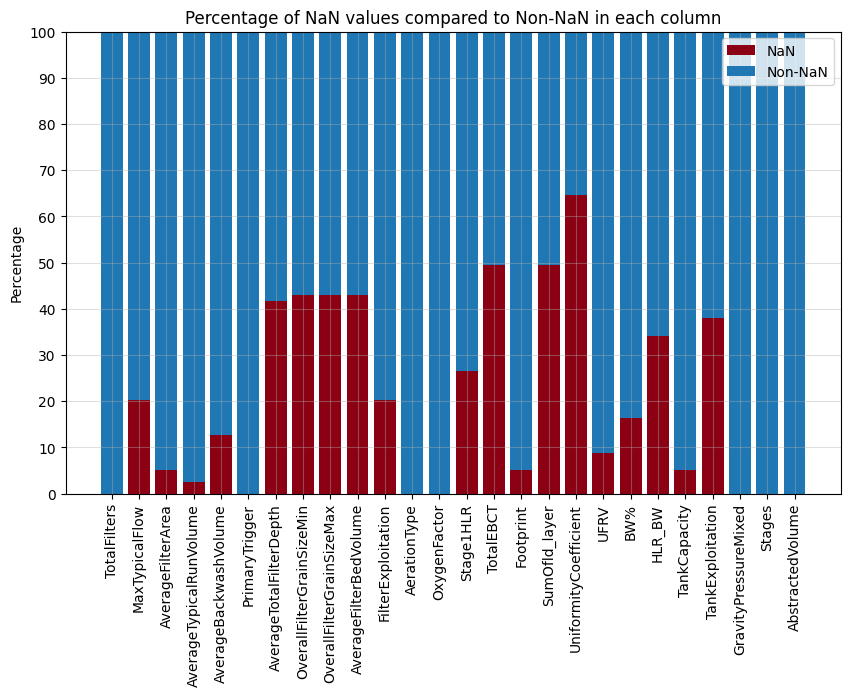

In [659]:
nan_percentage = df_cleaned.isna().sum() / len(df_cleaned) * 100
non_nan_percentage = 100 - nan_percentage

plt.figure(figsize=(10, 6))
bars_nan = plt.bar(x=nan_percentage.index, height=nan_percentage, color='#8B0013')
bars = plt.bar(x=nan_percentage.index, height=non_nan_percentage, bottom=nan_percentage)

plt.title('Percentage of NaN values compared to Non-NaN in each column')
plt.grid(alpha=0.4)
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 101, 10))
plt.legend([bars_nan[0], bars[0]], ['NaN', 'Non-NaN'])
plt.show()

# Data cleaning

## Removing unnesessary data

We will remove the columns that have more than 50% of NaN records as they are not useful.

In [660]:
columns_with_50 = nan_percentage[nan_percentage > 50].index
df_cleaned = df_cleaned.drop(columns=columns_with_50)
print(f"Columns left: {len(df_cleaned.columns)} out of {len(df.columns)}")

Columns left: 25 out of 27


We have to inspect the columns with more than 30% of missing data and consider if we should remove them.

In [661]:
columns_with_30 = nan_percentage[(nan_percentage > 30) & (nan_percentage < 50)].index
df_cleaned[columns_with_30].tail()

,AverageTotalFilterDepth,OverallFilterGrainSizeMin,OverallFilterGrainSizeMax,AverageFilterBedVolume,TotalEBCT,SumOfld_layer,HLR_BW,TankExploitation
74,142.0,0.8,150.0,60.686602,40.86,90.809524,NaN,39.682540
75,190.0,0.8,8.0,19.339643,16.49,1708.095230,51.086775,NaN
76,170.0,1.4,4.0,25.079249,36.11,842.857154,30.367735,45.833333
77,NaN,NaN,NaN,NaN,NaN,NaN,32.053507,NaN
78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.345136


The columns are low to medium in importance depending on the task we have to solve. We could we impute the data if we had more records. In this case this is subset, so probably for training Machine Learning model the full set will be presented. In this case we have only data cleaning and analytic tasks, so we will drop the columns with NaN percentage above 30.

In [662]:
df_cleaned = df_cleaned.drop(columns=columns_with_30)
print(f"Columns left: {len(df_cleaned.columns)} out of {len(df.columns)}")

Columns left: 17 out of 27


## Imputing columns

To handle missing values in the dataset, we will use imputers from the sklearn package. For columns with a NaN percentage below 20%, we will apply the IterativeImputer, which uses regression models to predict missing values based on other features. This method requires sufficient data to make accurate predictions. For columns with a NaN percentage between 20% and 30%, we will employ median imputation, as the median is robust to skewed distributions and outliers, making it an effective choice for handling moderately missing data.

## Iterative Imputer

In [663]:
columns_under_20 = nan_percentage[nan_percentage < 20].index

df_iterative = df_cleaned[columns_under_20]
df_iterative.head()

,TotalFilters,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,AerationType,OxygenFactor,Footprint,UFRV,BW%,TankCapacity,GravityPressureMixed,Stages,AbstractedVolume
0,6,6.000000,5200.0,10.0,Time,Cascade,1.880000,143.341204,866.666667,0.414525,27.294778,Gravity,Single,253543
1,4,4.908739,300.0,28.0,Volume,Air injection,1.620000,16.714412,40.743665,23.000062,2.576075,Pressure,Double,612094
2,4,15.343900,3800.0,83.3,Volume,Bottom aeration,2.213333,44.693822,249.217919,2.192086,21.825600,Gravity,Double,682318
3,2,16.000000,1200.0,26.0,Volume,Cascade,2.073333,194.588021,75.000000,2.166907,12.554300,Gravity,Single,156998
4,2,1.495000,250.0,4.5,Volume,Cascade,1.313333,412.300024,167.224093,1.818182,52.220566,Gravity,Single,6710


Including columns without NaN values could help the Iterative Imputer to understand better the data and try to predict better values.

In [664]:
interative_imputer_float = IterativeImputer(random_state=42, initial_strategy='median')

df_iterative_num = df_iterative.select_dtypes(include=['float64', 'int64'])

df_iterative_imputed_num = interative_imputer_float.fit_transform(df_iterative_num)

df_cleaned[df_iterative_num.columns] = df_iterative_imputed_num

df_cleaned[df_iterative_num.columns]

,TotalFilters,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,OxygenFactor,Footprint,UFRV,BW%,TankCapacity,AbstractedVolume
0,6.0,6.000000,5200.000000,10.00,1.880000,143.341204,866.666667,0.414525,27.294778,253543.0
1,4.0,4.908739,300.000000,28.00,1.620000,16.714412,40.743665,23.000062,2.576075,612094.0
2,4.0,15.343900,3800.000000,83.30,2.213333,44.693822,249.217919,2.192086,21.825600,682318.0
3,2.0,16.000000,1200.000000,26.00,2.073333,194.588021,75.000000,2.166907,12.554300,156998.0
4,2.0,1.495000,250.000000,4.50,1.313333,412.300024,167.224093,1.818182,52.220566,6710.0
...,...,...,...,...,...,...,...,...,...,...
74,16.0,47.940002,15468.364811,110.00,1.546667,24.106636,298.138817,0.178441,9.176959,11454775.0
75,20.0,10.178760,4500.000000,57.00,2.133333,22.050800,442.097088,1.236822,6.040393,11021800.0
76,6.0,14.752500,2331.501370,51.57,1.673333,209.076387,158.041107,4.446077,22.367525,423362.0
77,12.0,37.437401,4400.000000,134.00,2.200000,152.513970,93.489396,35.386015,17.216675,1521895.0


## Simple Imputer

Now we will impute the records between 20% and 30% with SimpleImpute using the median.

In [665]:
columns_with_20_30 = nan_percentage[(nan_percentage > 20) & (nan_percentage < 30)].index
df_simple = df_cleaned[columns_with_20_30]
df_simple.head()

,MaxTypicalFlow,FilterExploitation,Stage1HLR
0,50.0,57.886530,1.388889
1,110.0,63.521586,11.204508
2,120.0,64.908486,3.935020
3,NaN,NaN,NaN
4,NaN,NaN,NaN


Only this three columns has to be imputed.

In [666]:
simple_imputer = SimpleImputer(strategy='median')

df_simple_imputed = simple_imputer.fit_transform(df_simple)

df_cleaned[df_simple.columns] = df_simple_imputed

df_cleaned[df_simple.columns]

,MaxTypicalFlow,FilterExploitation,Stage1HLR
0,50.00,57.886530,1.388889
1,110.00,63.521586,11.204508
2,120.00,64.908486,3.935020
3,120.00,63.279585,3.742502
4,120.00,63.279585,3.742502
...,...,...,...
74,1426.00,91.698648,5.242647
75,1407.29,89.405620,6.912876
76,250.00,19.331598,2.824380
77,120.00,63.279585,3.742502


Only the UniformityCoefficient has left to be imputed.

In [667]:
df_cleaned.isna().sum()

TotalFilters               0
MaxTypicalFlow             0
AverageFilterArea          0
AverageTypicalRunVolume    0
AverageBackwashVolume      0
PrimaryTrigger             0
FilterExploitation         0
AerationType               0
OxygenFactor               0
Stage1HLR                  0
Footprint                  0
UFRV                       0
BW%                        0
TankCapacity               0
GravityPressureMixed       0
Stages                     0
AbstractedVolume           0
dtype: int64

## Encoding

Getting the categorical data from the dataset and moving the Stages column to its own variable because it will be treated with OrdinalEncoding.

In [668]:
df_ONE_obj = df_cleaned.select_dtypes(include=['object'])

df_OE_obj = pd.DataFrame(df_ONE_obj["Stages"], columns=["Stages"])
df_ONE_obj = df_ONE_obj.drop(columns="Stages")

print(f'df_ONE_obj: \n{df_ONE_obj.head()}\n')
print(f'df_OE_obj: \n{df_OE_obj.head()}')

df_ONE_obj: 
  PrimaryTrigger     AerationType GravityPressureMixed
0           Time          Cascade              Gravity
1         Volume    Air injection             Pressure
2         Volume  Bottom aeration              Gravity
3         Volume          Cascade              Gravity
4         Volume          Cascade              Gravity

df_OE_obj: 
   Stages
0  Single
1  Double
2  Double
3  Single
4  Single


### One Hot Encoding

For each column that we will One Hot Encode we will first check the unique values and how many we have of each. Based on the result we will proceed further with some transformation if needed. Lastly we will encode the categories after the columns are checked.

#### PrimaryTrigger

In [669]:
print(f"Unique values in the column 'Primary Trigger': \n{df_ONE_obj["PrimaryTrigger"].value_counts()}")

Unique values in the column 'Primary Trigger': 
PrimaryTrigger
Volume                     58
Time                       19
Waterlevel above filter     1
Mix                         1
Name: count, dtype: int64


Here we can see that "Waterlevel above filter" and "Mix" have only 1 record. That does not give us a lot of insight to work with, so we decided to change them to the mode of the column.

In [670]:
# Calculate the mode of the PrimaryTrigger column
mode_primary_trigger = df_ONE_obj['PrimaryTrigger'].mode()[0]

# Replace "Waterlevel above filter" and "Mix" with the mode
df_ONE_obj['PrimaryTrigger'] = df_ONE_obj['PrimaryTrigger'].replace(['Waterlevel above filter', 'Mix'], mode_primary_trigger)

print(df_ONE_obj['PrimaryTrigger'].value_counts())

PrimaryTrigger
Volume    60
Time      19
Name: count, dtype: int64


#### Aeration Type

In [671]:
print(f"Unique values in the column 'Aeration Type': \n{df_ONE_obj["AerationType"].value_counts()}")

Unique values in the column 'Aeration Type': 
AerationType
Bottom aeration          28
Cascade                  26
Air injection            12
Pure oxygen injection     6
Passive plate aerator     4
No primary aeration       1
Other                     1
Inka                      1
Name: count, dtype: int64


Here we have three records - "Other", "Inka" and "No primary aeration" which have only one presence in the data. Here because they are three and there is record "Other" we decided to put change them to "Other".

In [672]:
# Identify unique values in the AerationType column
unique_values = df_ONE_obj['AerationType'].value_counts()

# Find values that appear only once
single_occurrence_values = unique_values[unique_values == 1].index

# Replace these values with "Other"
df_ONE_obj['AerationType'] = df_ONE_obj['AerationType'].replace(single_occurrence_values, 'Other')

# We will replace the space with an underscore in the column names
# Replace spaces with underscores in the column names
for col in df_ONE_obj.columns:
    if df_ONE_obj[col].dtype == "object":
        df_ONE_obj[col] = df_ONE_obj[col].str.replace(' ', '_')

print(df_ONE_obj['AerationType'].value_counts())

AerationType
Bottom_aeration          28
Cascade                  26
Air_injection            12
Pure_oxygen_injection     6
Passive_plate_aerator     4
Other                     3
Name: count, dtype: int64


#### Gravity Pressure Mixed

In [673]:
print(f"Unique values in the column 'Gravity Pressure Mixed': \n{df_ONE_obj["GravityPressureMixed"].value_counts()}")

Unique values in the column 'Gravity Pressure Mixed': 
GravityPressureMixed
Gravity     52
Pressure    25
Mixed        2
Name: count, dtype: int64


Here we have three categories. The "Mixed" seems to have only 2 records, but based on the title of the column it has some importance. It depends based on the task at hand if we should exclude or include "Mixed". For now we will keep it because we do not have that much Domain knowledge. 

### Ordinal Encoding

For Ordinal encoding we will go through the same steps as we went with One Hot Encoding. The difference will be that the data will be ordinal (not nominal) and we will use Ordinal Encoding.

#### Stages

In [674]:
unique_values = df_OE_obj["Stages"].value_counts()

print(f"Unique values in the column 'Stages': \n{unique_values}")

Unique values in the column 'Stages': 
Stages
Single    40
Double    37
Mixed      1
Triple     1
Name: count, dtype: int64


Since "Mixed" and "Triple" occure only once we can combine them into an "Other" category. 

In [675]:
single_occurrence_values = unique_values[unique_values == 1].index

# Replace these values with "Other"
df_OE_obj = df_OE_obj.replace(single_occurrence_values, 'Other')

print(df_OE_obj['Stages'].value_counts())

Stages
Single    40
Double    37
Other      2
Name: count, dtype: int64


### Encoding of the columns

In [676]:
transformer = ColumnTransformer(
    transformers=[
        ("OHE",OneHotEncoder(), df_ONE_obj.columns),
        ("OE",OrdinalEncoder(), df_OE_obj.columns),
    ]
)

# Fit the transformer to the data
df_encoded = transformer.fit_transform(pd.concat([df_ONE_obj, df_OE_obj], axis=1))

# Convert the result to a DataFrame
df_encoded = pd.DataFrame(df_encoded, columns=transformer.get_feature_names_out())

df_encoded.head()

,OHE__PrimaryTrigger_Time,OHE__PrimaryTrigger_Volume,OHE__AerationType_Air_injection,OHE__AerationType_Bottom_aeration,OHE__AerationType_Cascade,OHE__AerationType_Other,OHE__AerationType_Passive_plate_aerator,OHE__AerationType_Pure_oxygen_injection,OHE__GravityPressureMixed_Gravity,OHE__GravityPressureMixed_Mixed,OHE__GravityPressureMixed_Pressure,OE__Stages
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0


### Adding the encoded columns to df_cleaned

In [677]:
df_cleaned.head()

,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,FilterExploitation,AerationType,OxygenFactor,Stage1HLR,Footprint,UFRV,BW%,TankCapacity,GravityPressureMixed,Stages,AbstractedVolume
0,6.0,50.0,6.000000,5200.0,10.0,Time,57.886530,Cascade,1.880000,1.388889,143.341204,866.666667,0.414525,27.294778,Gravity,Single,253543.0
1,4.0,110.0,4.908739,300.0,28.0,Volume,63.521586,Air injection,1.620000,11.204508,16.714412,40.743665,23.000062,2.576075,Pressure,Double,612094.0
2,4.0,120.0,15.343900,3800.0,83.3,Volume,64.908486,Bottom aeration,2.213333,3.935020,44.693822,249.217919,2.192086,21.825600,Gravity,Double,682318.0
3,2.0,120.0,16.000000,1200.0,26.0,Volume,63.279585,Cascade,2.073333,3.742502,194.588021,75.000000,2.166907,12.554300,Gravity,Single,156998.0
4,2.0,120.0,1.495000,250.0,4.5,Volume,63.279585,Cascade,1.313333,3.742502,412.300024,167.224093,1.818182,52.220566,Gravity,Single,6710.0


In [678]:
df_cleaned = df_cleaned.drop(columns=df_ONE_obj.columns.tolist() + df_OE_obj.columns.tolist())

df_cleaned = pd.concat([df_cleaned, df_encoded], axis=1)

df_cleaned.head()

,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,FilterExploitation,OxygenFactor,Stage1HLR,Footprint,UFRV,...,OHE__AerationType_Air_injection,OHE__AerationType_Bottom_aeration,OHE__AerationType_Cascade,OHE__AerationType_Other,OHE__AerationType_Passive_plate_aerator,OHE__AerationType_Pure_oxygen_injection,OHE__GravityPressureMixed_Gravity,OHE__GravityPressureMixed_Mixed,OHE__GravityPressureMixed_Pressure,OE__Stages
0,6.0,50.0,6.000000,5200.0,10.0,57.886530,1.880000,1.388889,143.341204,866.666667,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,4.0,110.0,4.908739,300.0,28.0,63.521586,1.620000,11.204508,16.714412,40.743665,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4.0,120.0,15.343900,3800.0,83.3,64.908486,2.213333,3.935020,44.693822,249.217919,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2.0,120.0,16.000000,1200.0,26.0,63.279585,2.073333,3.742502,194.588021,75.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
4,2.0,120.0,1.495000,250.0,4.5,63.279585,1.313333,3.742502,412.300024,167.224093,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0


# Outliers, correcting distribution, scaling and correlation

We will plot the numerical values of our dataset to look through the outliers and decide what to do with them.

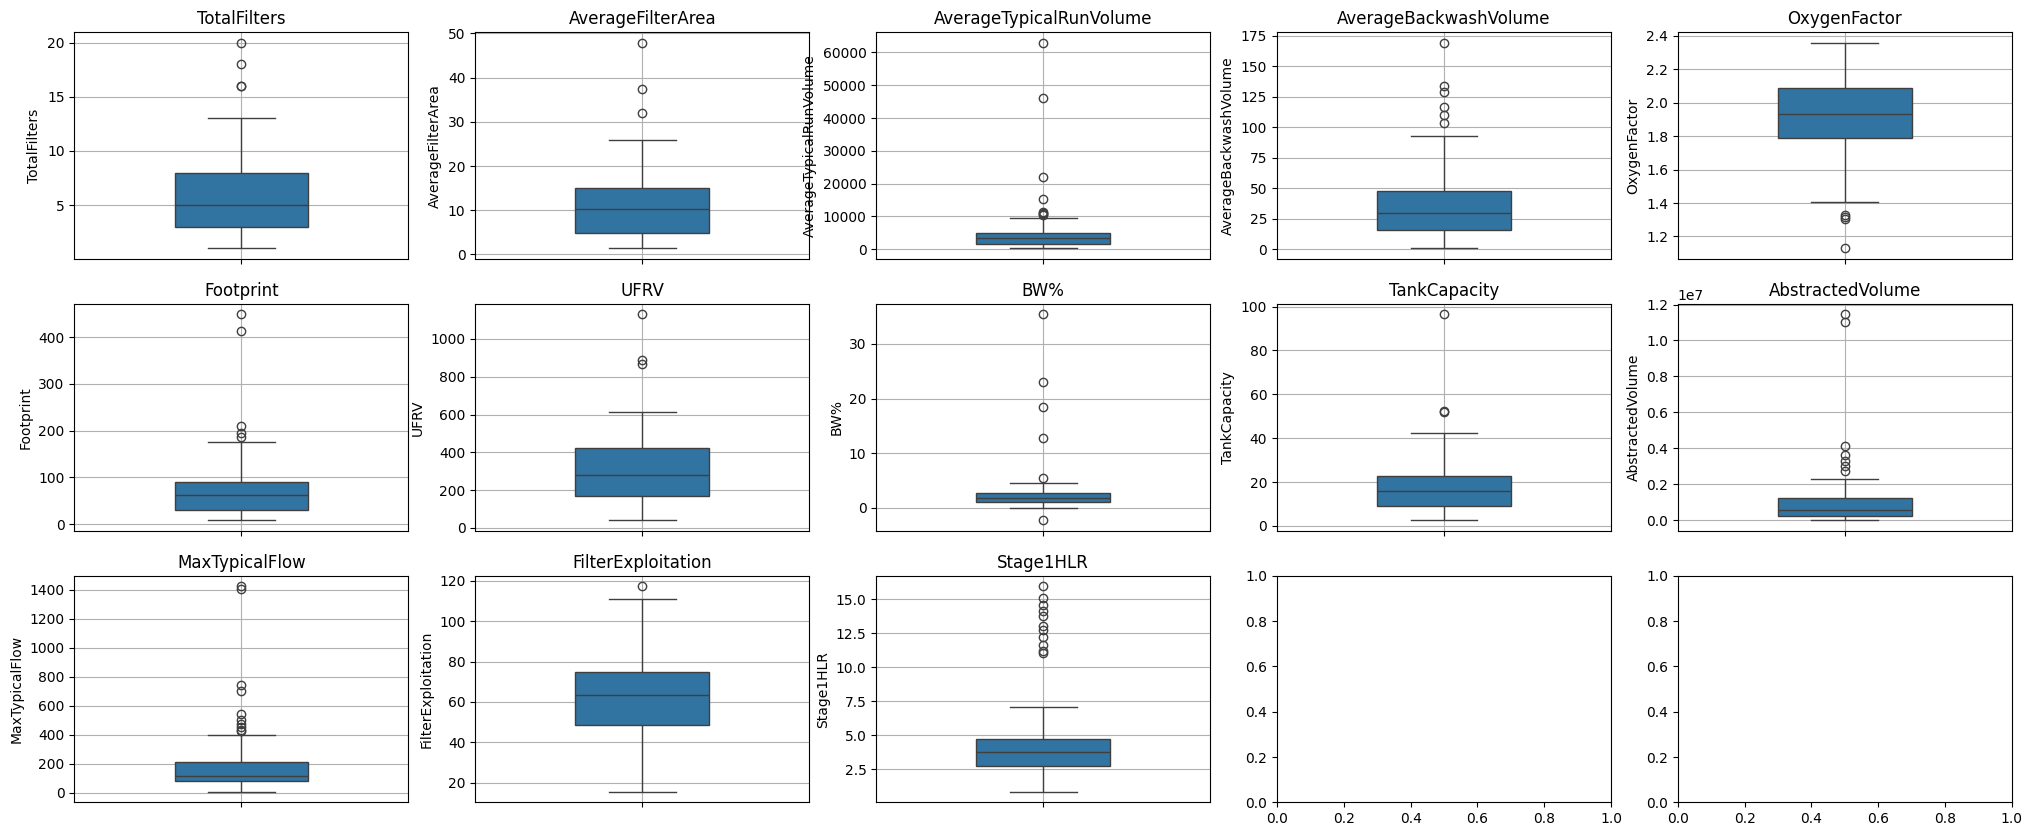

In [679]:
# Selecting numeric columns without the Encoded columns
df_cleaned_num = df_cleaned[df_iterative_num.columns.to_list() + df_simple.columns.to_list()]

fig, axes = plt.subplots(3, 5, figsize=(25, 10))

for i, column in enumerate(df_cleaned_num.columns):
    sns.boxplot(y=df_cleaned_num[column], ax=axes[i//5, i%5], width=0.4)
    axes[i//5, i%5].set_title(column)
    axes[i//5, i%5].grid(True)

plt.show()

## Thoughts on Outliers
At first glance, it is evident that each column contains some outliers. A closer look at the boxplots reveals that certain columns, such as MaxTypicalFlow, AverageTypicalRunVolume, and Footprint, have extreme cases of outliers.

There are several pros and cons to consider when deciding whether to retain these outliers:

### Pros

- Outliers can highlight unusual or critical events, potentially offering valuable insights.
- Retaining outliers may help models generalize better, especially if the goal is to build a robust model that can handle extreme conditions.

### Cons

- Outliers can disproportionately affect model parameters, particularly in models sensitive to variance (e.g., linear regression), resulting in biased or inaccurate predictions.
- Outliers can skew the distribution, impacting summary statistics and complicating the application of statistical models that assume normally distributed data.
- In smaller datasets (like ours), models may overfit to outliers, leading to higher error rates and making predictions on typical data less reliable.

### Possible Approaches for Handling Outliers

- **Winsorization**: The winsorize function from the scipy package can cap extreme values at specified percentiles. This preserves the data while reducing skewness caused by outliers.
- **Transformations**: Transforming the data using square root, logarithmic, or Box-Cox transformations can bring extreme values closer to the mean, thereby reducing skewness and making the data more amenable to statistical analysis.

### Conclusion

Given the small size of our dataset, we have decided to keep the outliers for now. If we had more domain knowledge, we could determine whether the outliers indicate malfunctions or significant events. We will keep in mind, however, that the data is not normally distributed. This will influence our choices around scaling and transforming the data in later stages of our analysis.

## Dealing with outliers 

When going through the outliers from the boxplots above we saw that the BW% has a negative outlier which looks like an error. We will set it to 0 so we don't have to drop the row.

In [680]:
df_cleaned.loc[df_cleaned['BW%'] < 0, 'BW%'] = 0
df_cleaned_num = df_cleaned[df_cleaned_num.columns]

print(f"Rows with BW% bellow 0: {(df_cleaned['BW%'] < 0).sum()}")

Rows with BW% bellow 0: 0


We will now take a look at the extreme outliers in our data. We will find them using the IQR. 


Column: TotalFilters
#19, Outlier: 16.00
#36, Outlier: 18.00
#74, Outlier: 16.00
#75, Outlier: 20.00

Column: AverageFilterArea
#26, Outlier: 25.92
#36, Outlier: 25.01
#45, Outlier: 25.43
#48, Outlier: 31.96
#74, Outlier: 47.94
#77, Outlier: 37.44

Column: AverageTypicalRunVolume
#8, Outlier: 22000.00
#17, Outlier: 10500.00
#29, Outlier: 46000.00
#43, Outlier: 11471.00
#52, Outlier: 63000.00
#55, Outlier: 10850.00
#64, Outlier: 11000.00
#68, Outlier: 9500.00
#74, Outlier: 15468.36

Column: AverageBackwashVolume
#2, Outlier: 83.30
#14, Outlier: 129.40
#26, Outlier: 103.68
#28, Outlier: 116.67
#29, Outlier: 169.55
#43, Outlier: 92.77
#48, Outlier: 91.50
#72, Outlier: 92.00
#74, Outlier: 110.00
#77, Outlier: 134.00

Column: OxygenFactor
#4, Outlier: 1.31
#6, Outlier: 1.41
#26, Outlier: 1.33
#33, Outlier: 1.44
#46, Outlier: 1.13
#64, Outlier: 1.31

Column: Footprint
#3, Outlier: 194.59
#4, Outlier: 412.30
#28, Outlier: 174.56
#50, Outlier: 448.61
#53, Outlier: 187.31
#69, Outlier: 152.65


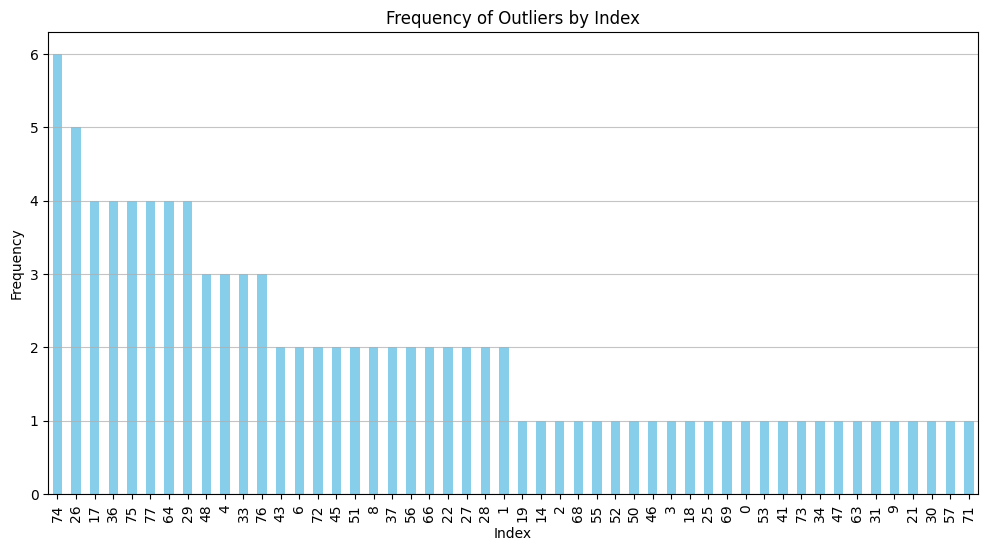

In [681]:
outliers_list = []

for column in df_cleaned_num.columns:
    outlier_threshold = 1
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    
    outliers_below = df_cleaned[column] < (Q1 - outlier_threshold * IQR)
    outliers_above = df_cleaned[column] > (Q3 + outlier_threshold * IQR)
    
    outliers = outliers_below | outliers_above

    if outliers.any():
        print(f'\nColumn: {column}')
        
        for index, outlier in df_cleaned[column][outliers].items():
            outliers_list.append({'Column': column, 'Index': index, 'Outlier': outlier})
            print(f"#{index}, Outlier: {outlier:.2f}")


# Create a DataFrame from the outliers_list
outliers_df = pd.DataFrame(outliers_list)

# Count the occurrences of each index
outliers_count = outliers_df['Index'].value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 6))
outliers_count.plot(kind='bar', color='skyblue')
plt.title('Frequency of Outliers by Index')
plt.xlabel('Index')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


It seems like the rows with index 74, 26, 29, 36, 75, 17, 64 has outliers in 3 or more columns which could be due to more water treatment capacity or something else. We will leave the outliers and won't change them further as we do not have that much domain knowledge and from the graph it seems that some of the water treatment plants have higher values with reason.

## Correction of normal distribution in data

Before we scale the data we will see how it is distributed.

Right-skewed columns:
- TotalFilters
- AverageFilterArea
- AverageTypicalRunVolume
- AverageBackwashVolume
- Footprint
- UFRV
- BW%
- TankCapacity
- AbstractedVolume
- MaxTypicalFlow
- Stage1HLR

Columns with skewness between -1 and 1:
- OxygenFactor
- FilterExploitation


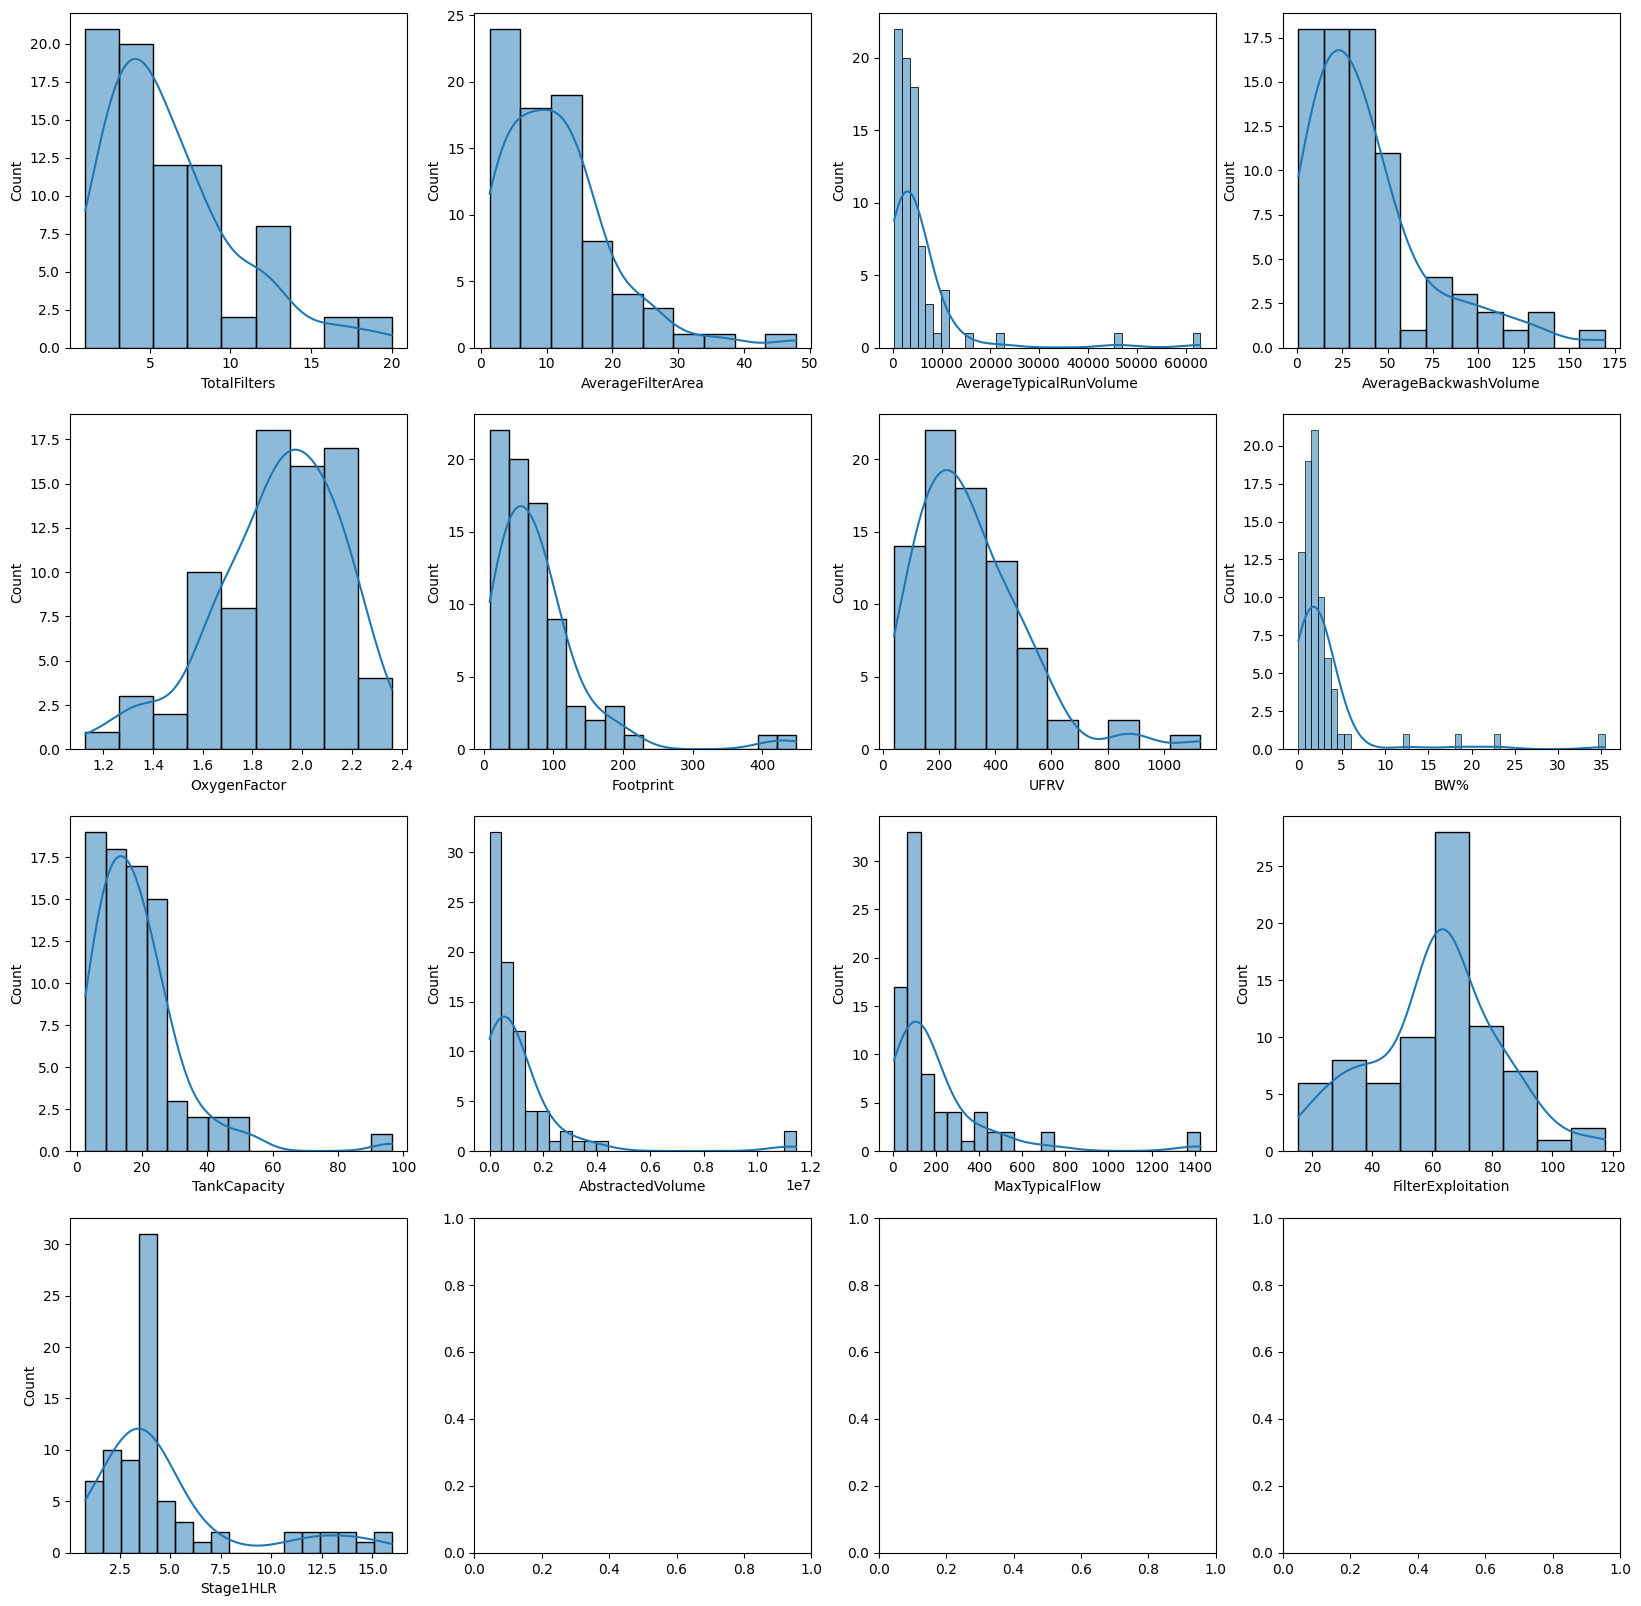

In [682]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))

right_skewed = []
left_skewed = []
normally_skewed = []

for i, column in enumerate(df_cleaned_num.columns):
    ax = axes[i//4, i%4]
    sns.histplot(df_cleaned_num[column], kde=True, ax=ax)
    if df_cleaned_num[column].skew() > 1: 
        right_skewed.append(column)
    elif df_cleaned_num[column].skew() < -1:
        left_skewed.append(column)
    elif df_cleaned_num[column].skew() < 1 and df_cleaned_num[column].skew() > -1:
        normally_skewed.append(column)

if len(right_skewed) != 0:
    print("Right-skewed columns:")
    for column in right_skewed:
        print(f"- {column}")

if len(left_skewed) != 0:
    print("\nLeft-skewed columns:")
    for column in left_skewed:
        print(f"- {column}")

if len(right_skewed) != 0:
    print("\nColumns with skewness between -1 and 1:")
    for column in normally_skewed:
        print(f"- {column}")

plt.show()


As we can see from the bar charts columns like OxygenFactor and FilterExploitation are more or less normally distributed. The others seem skewed to the right. Now we will try and log some right skewed columns. This will help the data to be more normally distributed which could be beneficial models like KNN, different linear models, Naive Bayes, etc.

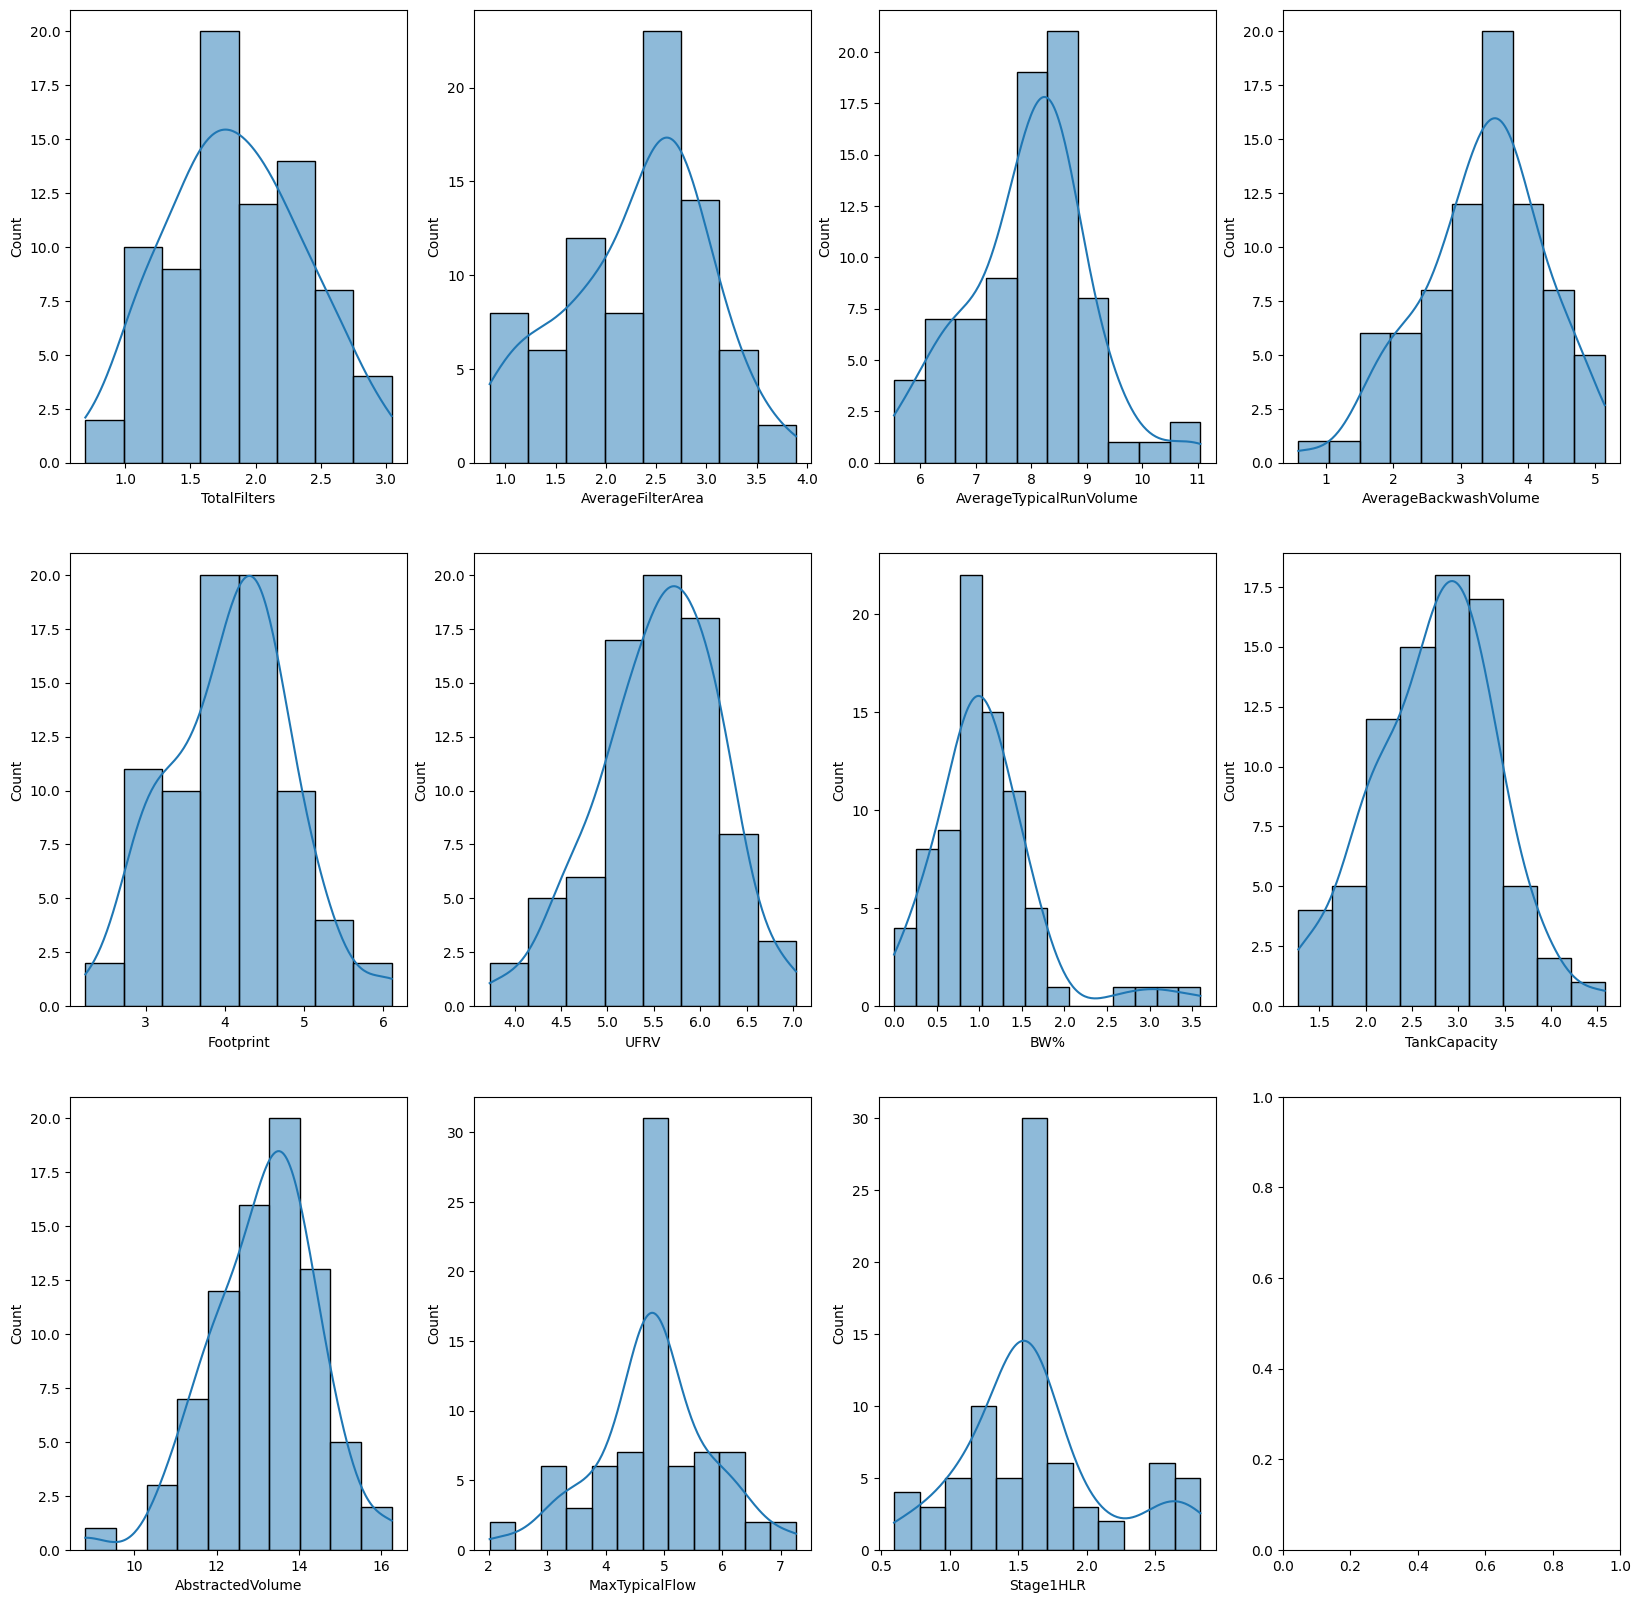

In [683]:
# right_skewed.remove('BW%')

for column in right_skewed:
    df_cleaned[column] = np.log1p(df_cleaned[column])

fig, axes = plt.subplots(3, 4, figsize=(20, 20))

for i, column in enumerate(right_skewed):
    ax = axes[i//4, i%4]
    sns.histplot(df_cleaned[column], kde=True, ax=ax)


The columns seem now more or less normally distributed. Here another way would be to use the **squared root** or **cubic root** which are less agressive and would work well on outliers and if the values of the column are near the 0. We think that the distribution of the columns look good for the data we have and now we will proceed with next step - scaling.

## Scaling data

We will use RobustScaler because it is less sensitive to outliers, which we have chosen to keep in the dataset. Unlike MinMaxScaler, which can be more effective when outliers are managed or removed, RobustScaler focuses on the median and interquartile range, making it a better choice for scaling data that contains extreme values. RobustScaler will help normalize the data without being influenced heavily by the outliers.

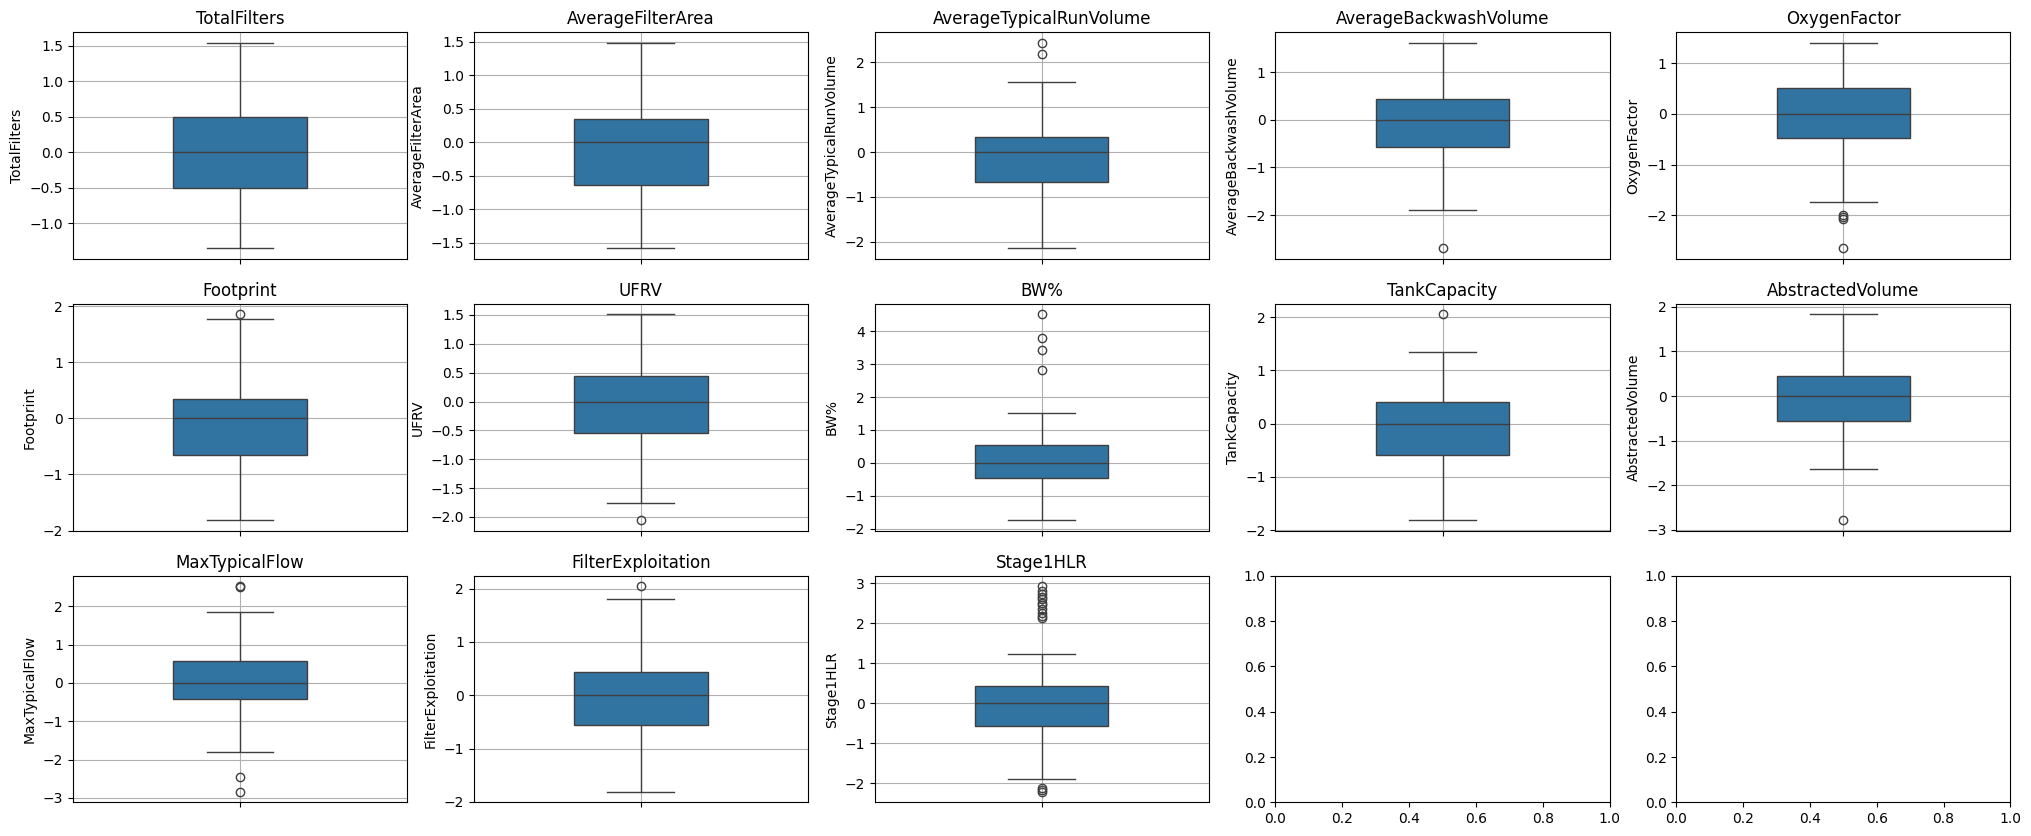

In [684]:
scaler = RobustScaler()

scaled_df_num = pd.DataFrame(scaler.fit_transform(df_cleaned[df_cleaned_num.columns]), columns=df_cleaned_num.columns)

df_cleaned[df_cleaned_num.columns] = scaled_df_num

fig, axes = plt.subplots(3, 5, figsize=(25, 10))

for i, column in enumerate(scaled_df_num.columns):
    sns.boxplot(y=scaled_df_num[column], ax=axes[i//5, i%5], width=0.4)
    axes[i//5, i%5].set_title(column)
    axes[i//5, i%5].grid(True)

plt.show()


## Checking correlation

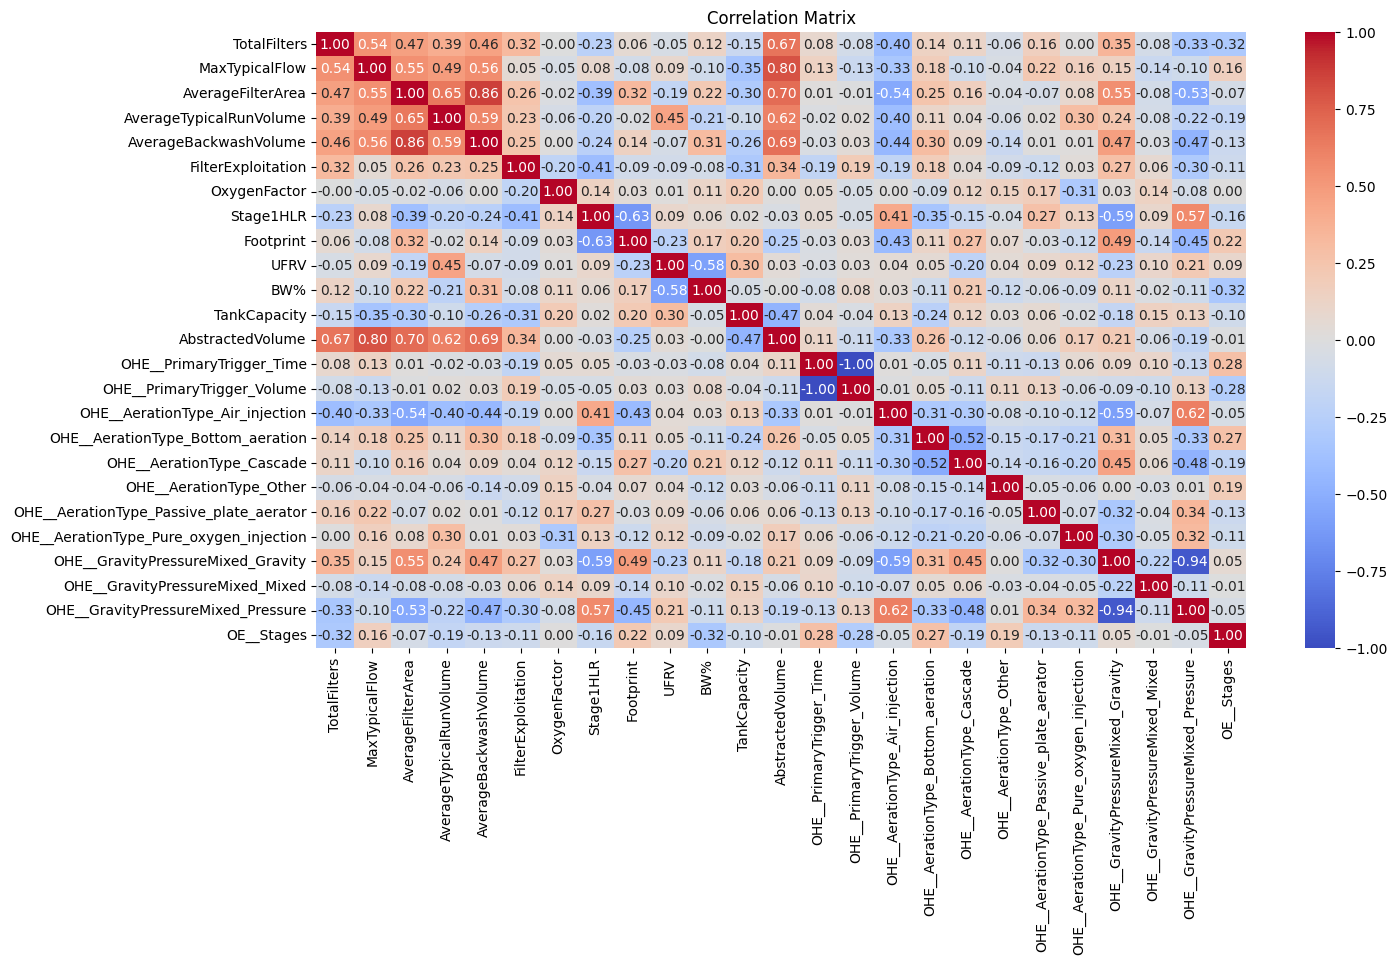

In [685]:
corr = df_cleaned.corr()

plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [686]:
corr_threshold = 0.6

corr_pairs = corr.unstack().reset_index()
corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']
corr_pairs = corr_pairs[(corr_pairs['Correlation'].abs() > corr_threshold) & (corr_pairs['Feature1'] != corr_pairs['Feature2'])]
corr_pairs = corr_pairs.drop_duplicates(subset=['Correlation'])

print(corr_pairs)

                              Feature1                            Feature2  \
12                        TotalFilters                    AbstractedVolume   
37                      MaxTypicalFlow                    AbstractedVolume   
53                   AverageFilterArea             AverageTypicalRunVolume   
54                   AverageFilterArea               AverageBackwashVolume   
62                   AverageFilterArea                    AbstractedVolume   
87             AverageTypicalRunVolume                    AbstractedVolume   
112              AverageBackwashVolume                    AbstractedVolume   
183                          Stage1HLR                           Footprint   
339           OHE__PrimaryTrigger_Time          OHE__PrimaryTrigger_Volume   
398    OHE__AerationType_Air_injection  OHE__GravityPressureMixed_Pressure   
548  OHE__GravityPressureMixed_Gravity  OHE__GravityPressureMixed_Pressure   

     Correlation  
12      0.667361  
37      0.801520  
53    

We selected a correlation threshold of 0.6, as some correlations, such as the one around 0.69 (close to 0.7) in feature 97, are significant enough to warrant attention. Correlations can negatively impact certain models, so they should be managed with respect to the model group being used.

Linear models suffer a lot from correlated features. To build better model, multicollinearity can be treated by: 
- Find correlated pairs and drop the less important feature in each pair.
- Combining the two features into a new one (if possible).
- Models with regularization, such as Lasso or Ridge regression, can reduce the impact of correlated features by constraining the coefficients.
- PCA can transform correlated features into uncorrelated components, which helps in reducing multicollinearity.

Highly correlated features do not have that much influence on non-linear model. Although they could be treated by: 
- PCA can transform correlated features into uncorrelated components, which helps in reducing multicollinearity.
- Techniques like PCA can save computational resources and help prevent overfitting, especially in high-dimensional datasets.
  
Overall, non-linear models handle correlated features better than linear models, making multicollinearity less critical in these cases. However, feature engineering and dimensionality reduction can still improve efficiency and model performance.

# Conclusion

Challenges with the 80-row dataset containing many missing values include:

- **Difficulties with Imputation:** Imputing missing values accurately is challenging due to the limited data.
- **Inability to Use Data-Intensive Models:** Some models require more data to perform effectively, making them unsuitable for this dataset.
- **Reduced Model Performance:** The small size and missing data can impact model accuracy and generalization.
- **Limited Feature Engineering:** The dataset size restricts opportunities for effective feature engineering.
- **Challenges in Validation and Testing:** With so few rows, it’s difficult to create separate validation and test sets, complicating performance evaluation.

These are the main challenges that you can encounter when further training a model. Despite these challenges, we have cleaned the dataset to a point where further modeling decisions can be based on the specific problem and model requirements. As noted, this dataset is only a subset. The full dataset may benefit from similar cleaning steps, potentially enhanced by additional domain knowledge.

Finally, we confirm that the dataset is as clean as our current knowledge allows.